### SAADHANA SRINATH
Traffic Sign Detection and Recognition 

Dataset used - GTSRB dataset

### Building model from scratch and training

In [1]:
## importing the dependencies

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

%matplotlib inline

##### Handling the dataset

In [2]:
data = []
labels = []
classes = 43
p = 0

## specifying each class of the dataset
classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }


## Retrieving the images and their labels
print("Obtaining Images & its Labels..............\n(Printing the number of each folder after the folder has been loaded)\n")
for i in range(classes):
    path = os.path.join(r'G:/GTSRB Dataset/Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            ## for uniformity
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            
        except:
            print("Error loading image")
            
    print(i,end=' ')
    
print("\n\nDataset Loaded")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


Obtaining Images & its Labels..............
(Printing the number of each folder after the folder has been loaded)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

Dataset Loaded
(38883, 30, 30, 3) (38883,)


##### Performing Train-Test Split

In [3]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)     


(31106, 30, 30, 3) (7777, 30, 30, 3) (31106,) (7777,)


#####  Building a CNN

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
print("Initialized model")

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Initialized model


##### Training the model

In [5]:
## training
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
model.save("Traffic.h5")
print("Model saved to disk")

Epoch 1/20
973/973 [==============================] - 81s 83ms/step - loss: 1.7080 - accuracy: 0.5725 - val_loss: 0.3283 - val_accuracy: 0.9189
Epoch 2/20
973/973 [==============================] - 98s 101ms/step - loss: 0.5095 - accuracy: 0.8586 - val_loss: 0.1300 - val_accuracy: 0.9682
Epoch 3/20
973/973 [==============================] - 95s 97ms/step - loss: 0.3321 - accuracy: 0.9071 - val_loss: 0.0875 - val_accuracy: 0.9775
Epoch 4/20
973/973 [==============================] - 99s 102ms/step - loss: 0.2809 - accuracy: 0.9231 - val_loss: 0.0829 - val_accuracy: 0.9793
Epoch 5/20
973/973 [==============================] - 98s 100ms/step - loss: 0.2244 - accuracy: 0.9391 - val_loss: 0.0674 - val_accuracy: 0.9823
Epoch 6/20
973/973 [==============================] - 109s 112ms/step - loss: 0.2419 - accuracy: 0.9362 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 7/20
973/973 [==============================] - 114s 118ms/step - loss: 0.2166 - accuracy: 0.9424 - val_loss: 0.0675 - val_ac

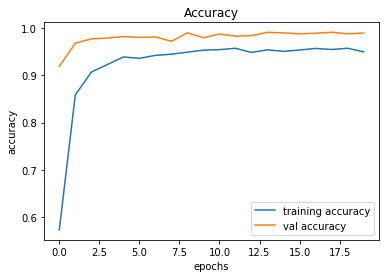

In [6]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


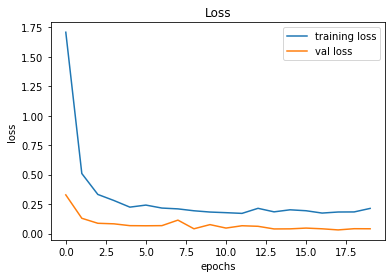

In [7]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Using the trained model in real-time

In [1]:
## importing the libraries and the trained model

import cv2
import imutils
import urllib.request
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

model = load_model('Traffic.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


In [2]:
classes = 43
classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }


##### Recognising signs in an img

In [3]:
## loading the image 
img = cv2.imread('Sign1.png')
    
img1 = Image.fromarray(img,"RGB")
test_image = img1.resize((30, 30))
test_image = np.expand_dims(test_image, axis=0)
test_image = np.array(test_image) 
    
print(model.predict)
result = model.predict_classes(test_image)[0]
sign = classs[result + 1]
print(sign)
cv2.putText(img,sign,(15,30),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
img = imutils.resize(img,width=500)  
    
    
cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()


<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000020BE9348E08>>


C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Turn right ahead


##### Real-time Recognition

In [ ]:
url='http://192.168.8.126:8080/shot.jpg'

while True:

    imgPath = urllib.request.urlopen(url)           ## to access, open the url and then load it into the variable
    imgNp = np.array(bytearray(imgPath.read()), dtype=np.uint8)    ## obtaining the data from the url
    frame = cv2.imdecode(imgNp, -1)   
    
    img = Image.fromarray(frame,"RGB")
    test_image = img.resize((30, 30))
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.array(test_image)

    result = model.predict_classes(test_image)[0]
    sign = classs[result + 1]
    print(sign)
    cv2.putText(frame,sign,(15,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,0,255),2)
    frame = imutils.resize(frame,width=500)
    
    cv2.imshow("Capturing",frame)
    key = cv2.waitKey(1) & 0xff
    if key == 27:
        break

cam.release()
cv2.destroyAllWindows()